### Lets Grow More
**DATA SCIENCE INTERSHIP LGMVIP(MAY-2022)**

**AUTHOR**: Jenin Johna

**PROBLEM STATEMENT**: Develop a neural network that can read handwriting.

<ol>
<li>Loading the Dataset.</li>
<li>Normalization of Data.</li>
<li>Creating a feed forward Neural Network.</li>
<li>Evaluation of model on the test data.</li>
<li>Testing model on our handwritten digits.</li>
</ol>

In [116]:
#inporting the necessary Libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2 as cv

In [117]:
#importing the dataset
(X_train,y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [118]:
#shape of the dataset
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [119]:
#the dataset is form of 2D array
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

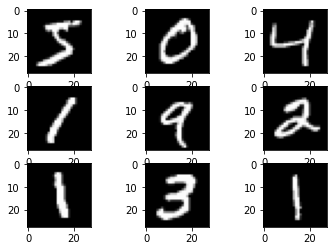

In [120]:
#ploting the dataset
for i in range(9):
    plt.subplot(330 + 1 + i)
    #plt.matshow(X_train[i])
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))


In [121]:
#the values of the handwritten dataset
y_train[:9]

array([5, 0, 4, 1, 9, 2, 1, 3, 1], dtype=uint8)

# Normalization of Data

As the data is greyscale the values are between 0(black) and 255(white), we have to normalize it between 0 and 1. No need to do it for the y_test and y_train as it's just labels for the images

In [122]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

## Creating a Neural Network Model 

In [123]:
#Using flatten to make it a 1 dimension array
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),#input layer
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),#Hidden layer
    keras.layers.Dense(10,activation='sigmoid')#Output layer
])


In [124]:
#Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#Fitting the model
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2987 - accuracy: 0.9167
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1403 - accuracy: 0.9589
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1009 - accuracy: 0.9700
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0763 - accuracy: 0.9775
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0625 - accuracy: 0.9804


## Evaluation of the model on the Test data.

In [125]:
#predicting the value for the test data
y_predicted=model.predict(X_test)
#Testing the model with the test data
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 948us/step - loss: 0.2597 - accuracy: 0.9555


[0.25966426730155945, 0.9555000066757202]

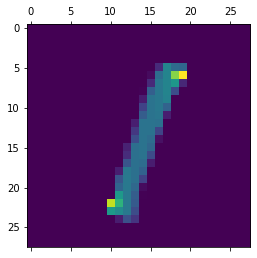

In [126]:
plt.matshow(X_test[5])

In [127]:
np.argmax(y_predicted[5])

1

In [128]:
#Creating the confusion matrix
y_predicted_labels= [np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(69.0, 0.5, 'Truth')

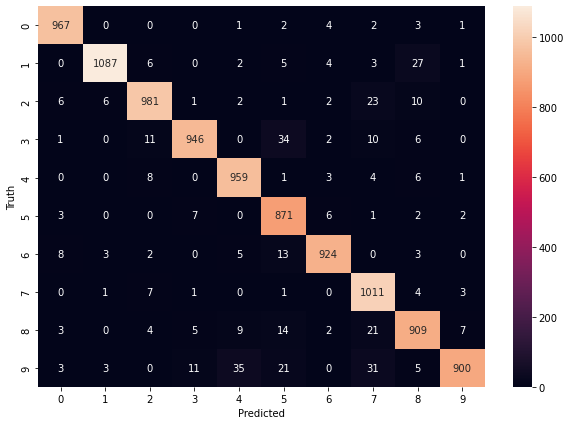

In [129]:
#heatmap for the confusion matrix
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
                

# Testing model on our handwritten digits

This number is: 2


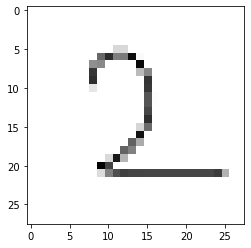

This number is: 3


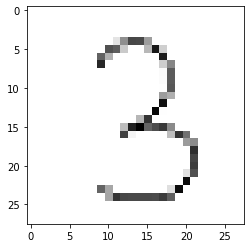

In [134]:

for x in range(1,3):
  img = cv.imread(f'{x}.png')[:,:,0] 
  img = np.invert(np.array([img]))
  prediction = model.predict(img)
  print(f'This number is: {np.argmax(prediction)}')
  plt.imshow(img[0], cmap = plt.cm.binary)
  plt.show()